<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group-7/Kaggle-Challange/blob/main/Kaggle_Challange_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install tpot
!pip install shap

In [45]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from google.colab import files
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap


In [46]:
# Load and read the csv files
train_data_path = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-7/Kaggle-Challange/main/train.csv'
test_data_path = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-7/Kaggle-Challange/main/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [47]:
#display train dataframe header
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [48]:
#Display test dataframe header
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [49]:
#This cell prints types, info and shows description of train dataframe
print(train_df.dtypes)
print(train_df.info())
print(train_df.describe())

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non

In [50]:
#This cell prints types, info and shows description of test dataframe
print(test_df.dtypes)
print(test_df.info())
print(test_df.describe())

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRD

In [51]:
# Generates descriptive statistics for categorical features in the dataframe and transposes the resulting dataframe
train_df.describe(include = "object").T
test_df.describe(include = "object").T

,count,unique,top,freq
PassengerId,4277,4277,0013_01,1
HomePlanet,4190,3,Earth,2263
CryoSleep,4184,2,False,2640
Cabin,4177,3265,G/160/P,8
Destination,4185,3,TRAPPIST-1e,2956
VIP,4184,2,False,4110
Name,4183,4176,Cints Erle,2


In [52]:
# Calculating the number and percentage of missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()
missing_values_percentage_train = train_df.isnull().mean()*100
missing_values_percentage_test = test_df.isnull().mean()*100
print("Missing values in train dataset:\n", missing_values_train)
print("\nPercentage of missing values in train dataset:\n", missing_values_percentage_train)
print("\nMissing values in test dataset:\n", missing_values_test)
print("\nPercentage of missing values in test dataset:\n", missing_values_percentage_test)

Missing values in train dataset:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Percentage of missing values in train dataset:
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Missing values in test dataset:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDec

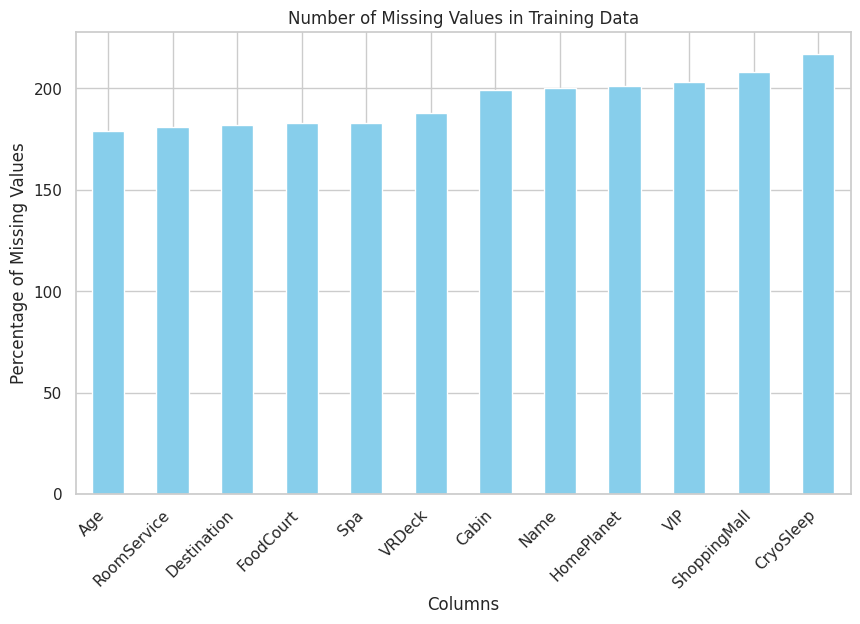

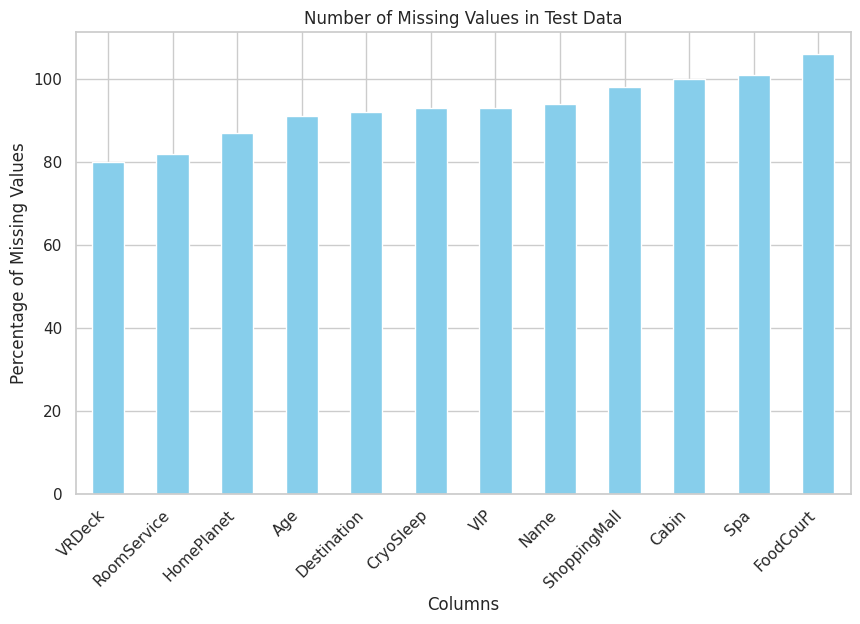

In [53]:
# Plots the missing values in the test and train dataset
def plot_missing_values(data, title):
  missing_values = data.isnull().sum()
  missing_values = missing_values[missing_values > 0]  # Filter columns with missing values
  missing_values.sort_values(inplace=True)

  plt.figure(figsize=(10, 6))
  missing_values.plot(kind='bar', color='skyblue')
  plt.title(title)
  plt.xlabel('Columns')
  plt.ylabel('Percentage of Missing Values')
  plt.xticks(rotation=45, ha='right')
  plt.show()

plot_missing_values(train_df, 'Number of Missing Values in Training Data')
plot_missing_values(test_df, 'Number of Missing Values in Test Data')

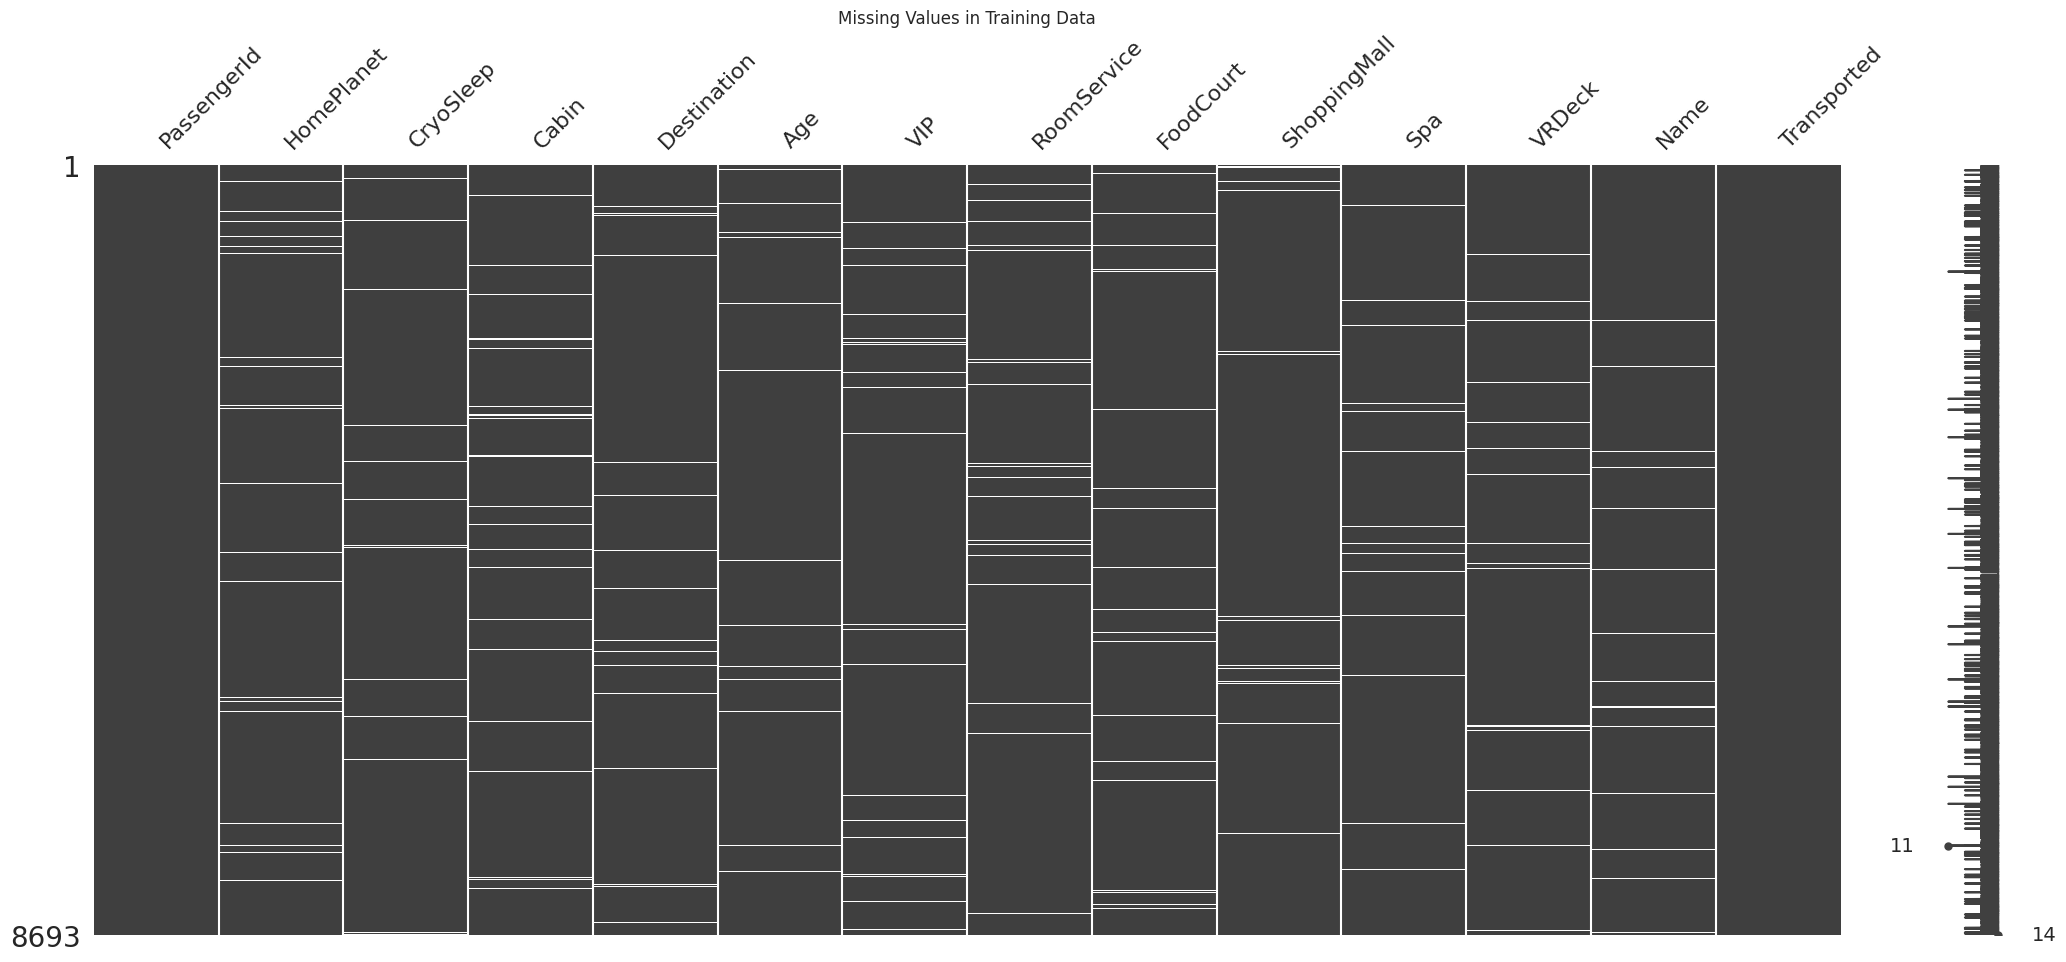

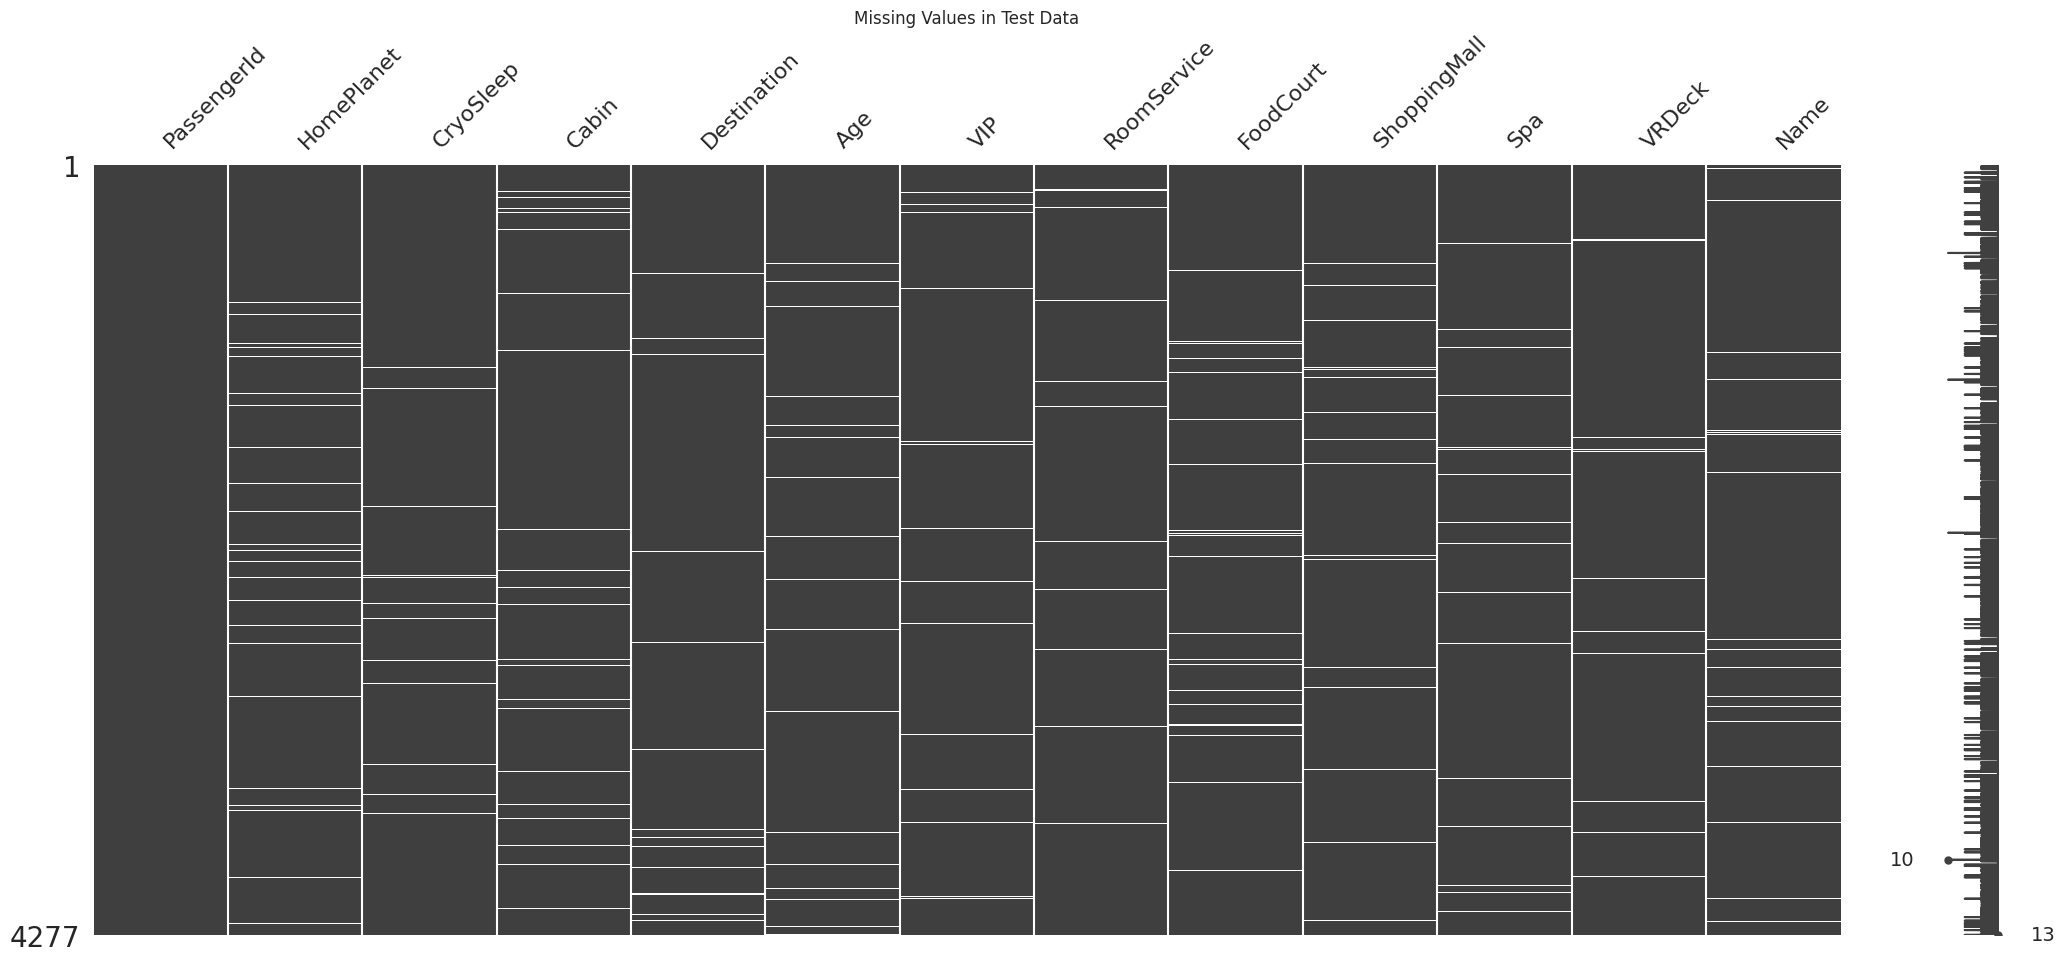

In [54]:
# Defines function for visualizing the missing values
def visualize_missing_values(data, title):
  msno.matrix(data)
  plt.title(title)
  plt.show()

visualize_missing_values(train_df, 'Missing Values in Training Data')
visualize_missing_values(test_df, 'Missing Values in Test Data')

In [55]:
#This provides a statistical analysis of 'Age' column
summary_df = train_df.groupby('Transported')['Age'].describe()
print(summary_df)

              count       mean        std  min   25%   50%   75%   max
Transported                                                           
False        4226.0  29.922858  13.699262  0.0  21.0  27.0  38.0  79.0
True         4288.0  27.748834  15.151705  0.0  18.0  26.0  37.0  78.0


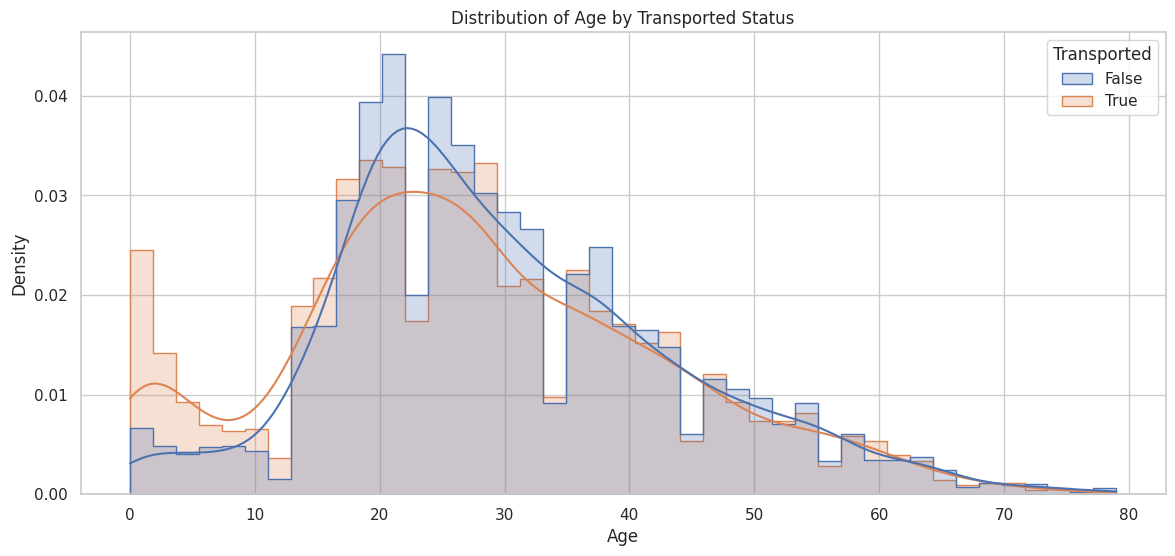

In [56]:
#This cell displays a plot that shows histogram and kernel density estimate(KDE)
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of 'Age' with respect to 'Transported' status
plt.figure(figsize=(14, 6))
sns.histplot(data=train_df, x="Age", hue="Transported", kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age by Transported Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


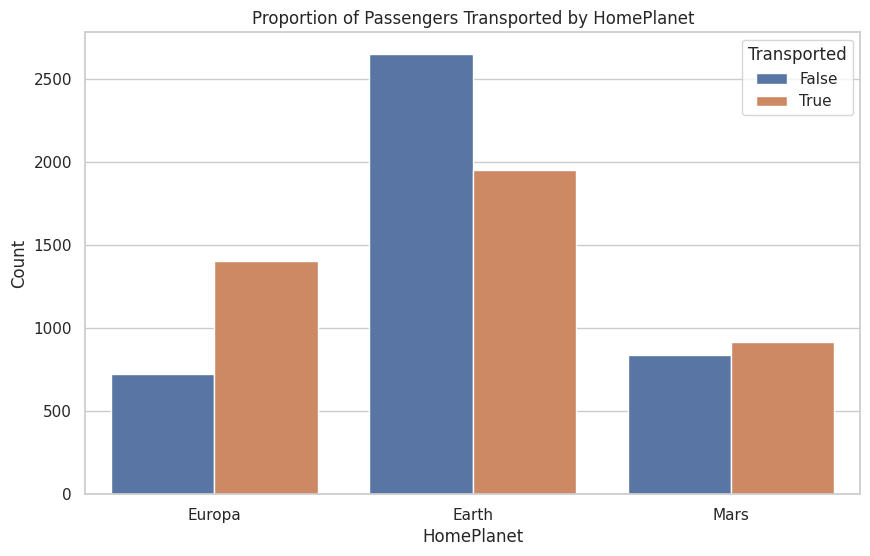

In [57]:
# plot proportion of passengers transported by HomePlanet
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x="HomePlanet", hue="Transported")
plt.title('Proportion of Passengers Transported by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.show()

<ipython-input-58-30b28da4364c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


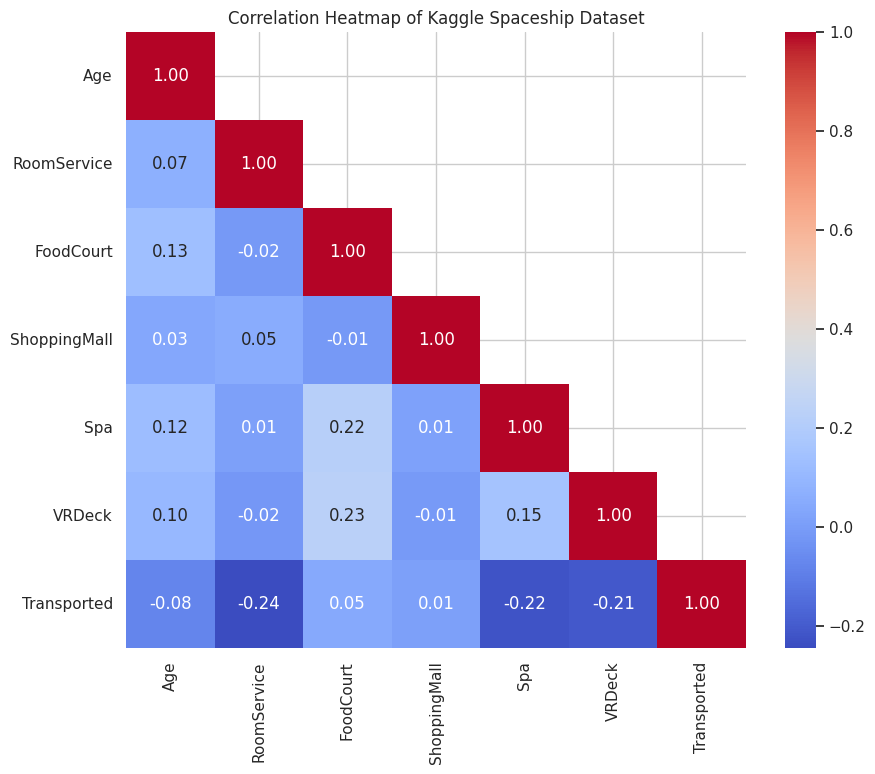

In [58]:
# compute and visualize correlation matrix
# create heatmap visualization
correlation_matrix = train_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap of Kaggle Spaceship Dataset")
plt.show()

In [59]:
#This function makes use of imputation to fill in missing values
def imputation(df):
  categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
  for column in categorical_columns:
      df[column].fillna(df[column].mode()[0], inplace=True)

  numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  for column in numerical_columns:
      df[column].fillna(df[column].median(), inplace=True)
  return df


train_df = imputation(train_df)
train_df['Cabin'].fillna('Z/9999/Z', inplace=True)
test_df = imputation(test_df)
test_df['Cabin'].fillna('Z/9999/Z', inplace=True)

In [60]:
#This block of code calculates the number and perventage of missing values in
#each columns of the dataframes
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()
missing_values_percentage_train = train_df.isnull().mean()*100
missing_values_percentage_test = test_df.isnull().mean()*100
print("Missing values in train dataset:\n", missing_values_train)
print("\nPercentage of missing values in train dataset:\n", missing_values_percentage_train)
print("\nMissing values in test dataset:\n", missing_values_test)
print("\nPercentage of missing values in test dataset:\n", missing_values_percentage_test)

Missing values in train dataset:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Percentage of missing values in train dataset:
 PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.300702
Transported     0.000000
dtype: float64

Missing values in test dataset:
 PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck          

In [61]:
#This function performs several pre-processing steps on a dataframe
def preprecess(df):
  df['deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
  df['num'] = df['Cabin'].apply(lambda x: int(x.split('/')[1]))
  df['side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
  df['CryoSleep'] = df['CryoSleep'].astype(int)
  df['VIP'] = df['VIP'].astype(int)
  df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'deck', 'side'])
  df = df.drop(labels=['Cabin', 'Name', 'PassengerId'], axis=1)
  return df
train_df = preprecess(train_df)
test_df = preprecess(test_df)

In [62]:
print(train_df.head)

<bound method NDFrame.head of       CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0  39.0    0          0.0        0.0           0.0     0.0   
1             0  24.0    0        109.0        9.0          25.0   549.0   
2             0  58.0    1         43.0     3576.0           0.0  6715.0   
3             0  33.0    0          0.0     1283.0         371.0  3329.0   
4             0  16.0    0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688          0  41.0    1          0.0     6819.0           0.0  1643.0   
8689          1  18.0    0          0.0        0.0           0.0     0.0   
8690          0  26.0    0          0.0        0.0        1872.0     1.0   
8691          0  32.0    0          0.0     1049.0           0.0   353.0   
8692          0  44.0    0        126.0     4688.0           0.0     0.0   

      VRDeck  Transported   num  ...  deck_C  deck_D  dec

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features and target variables
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVC', SVC()),
    ('Gaussian NB', GaussianNB()),
    ('Perceptron', Perceptron()),
    ('Decision Tree', DecisionTreeClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    print(f'{name} - Validation Accuracy: {accuracy}')

Random Forest - Validation Accuracy: 0.7958596894767107
KNN - Validation Accuracy: 0.7389304197814837
SVC - Validation Accuracy: 0.7694077055779184
Gaussian NB - Validation Accuracy: 0.7429557216791259
Perceptron - Validation Accuracy: 0.718803910293272
Decision Tree - Validation Accuracy: 0.7435307648073606


Validation Accuracy: 0.7958596894767107
Precision: 0.8131736526946107
Recall: 0.7733485193621867
F1 Score: 0.7927612375948628


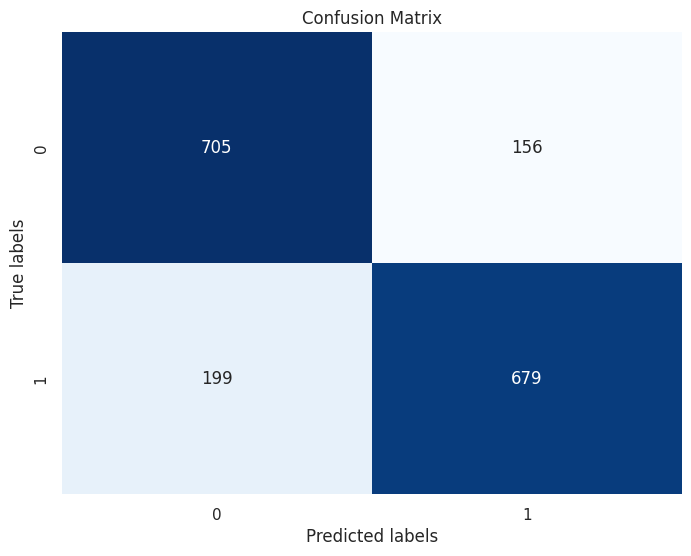

In [64]:
#This code is used for training a Random Forest Classifier on a dataset,
#evaluating its performance, and then displaying the evaluation results
#including a confusion matrix.

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Generate predictions on the validation set
y_pred1 = rf_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred1)
print("Validation Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_val, y_pred1)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_val, y_pred1)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_val, y_pred1)
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
#Make predictions using random forest classifier
X_test = test_df
y_pred_rf = rf_model.predict(X_test)

In [66]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8100388416800708

Generation 2 - Current best internal CV score: 0.8100388416800708

Generation 3 - Current best internal CV score: 0.8100389451199644

Generation 4 - Current best internal CV score: 0.8100389451199644

Generation 5 - Current best internal CV score: 0.8106143812484161

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=14, min_samples_split=15, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

Validation Accuracy: 0.7901092581943646
Precision: 0.7911464245175936
Recall: 0.7938496583143508
F1 Score: 0.7924957362137578


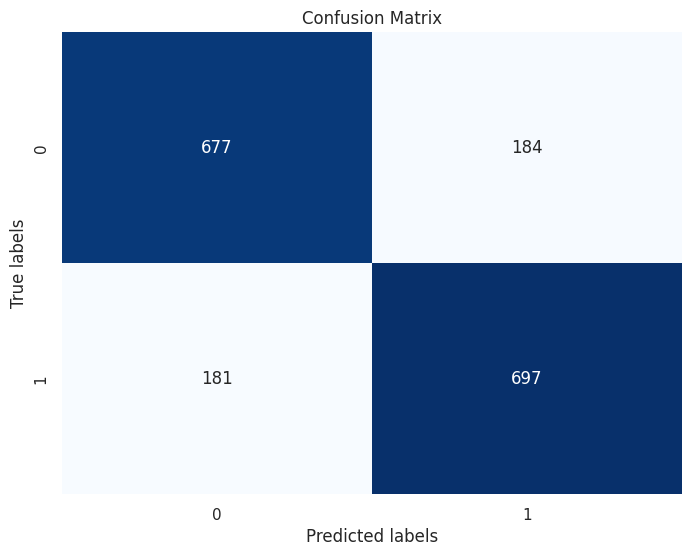

In [67]:
# Defines and trains an Extra Tree classifier on a training dataset
# Evaluates its performance on validation set
etc_model = ExtraTreesClassifier( bootstrap=False, criterion='entropy', max_features=0.8, min_samples_leaf=14, min_samples_split=15, n_estimators=100)
etc_model.fit(X_train, y_train)


# Generate predictions on the validation set
y_pred2 = etc_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred2)
print("Validation Accuracy:", accuracy)

# Calculate precision score
precision = precision_score(y_val, y_pred2)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_val, y_pred2)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_val, y_pred2)
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [68]:
y_pred_etc = etc_model.predict(X_test)

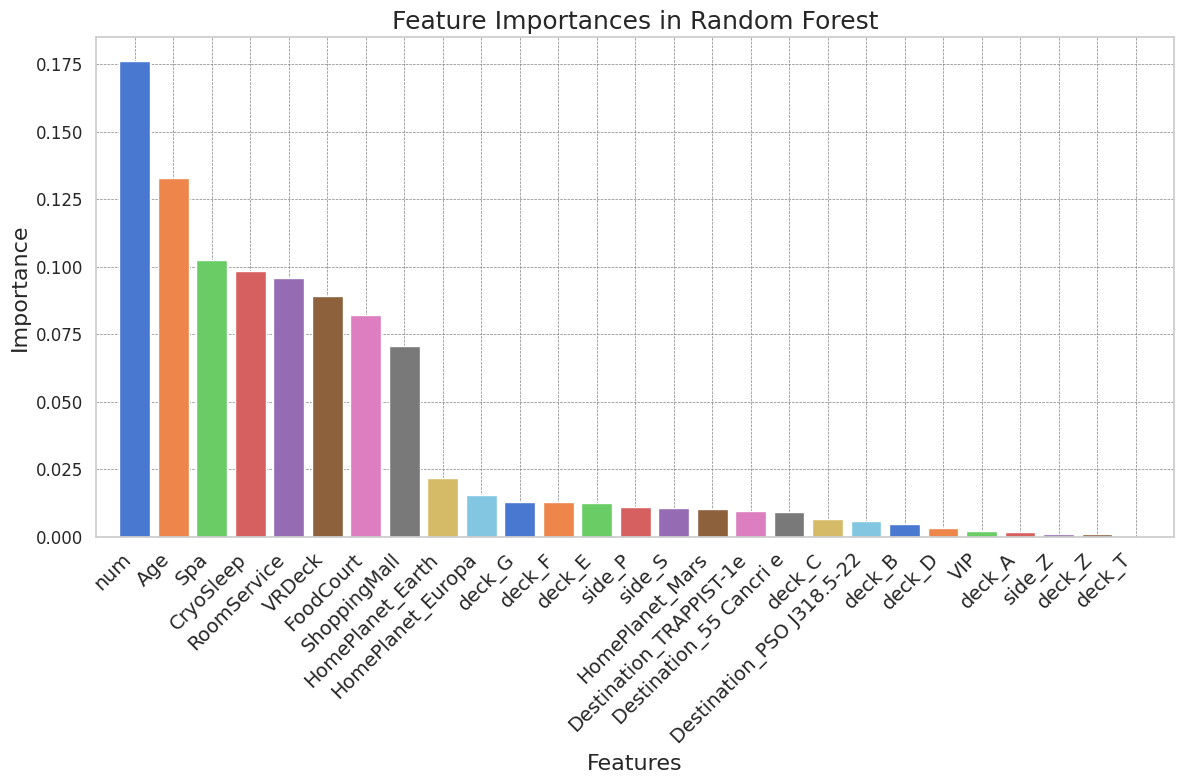

In [69]:
#This block of code visualises the feature importance determined by a
#trained Random Forest model.

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Random Forest', fontsize=18)
plt.bar(range(X_train.shape[1]), importances[indices], color=sns.color_palette("muted"), align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()


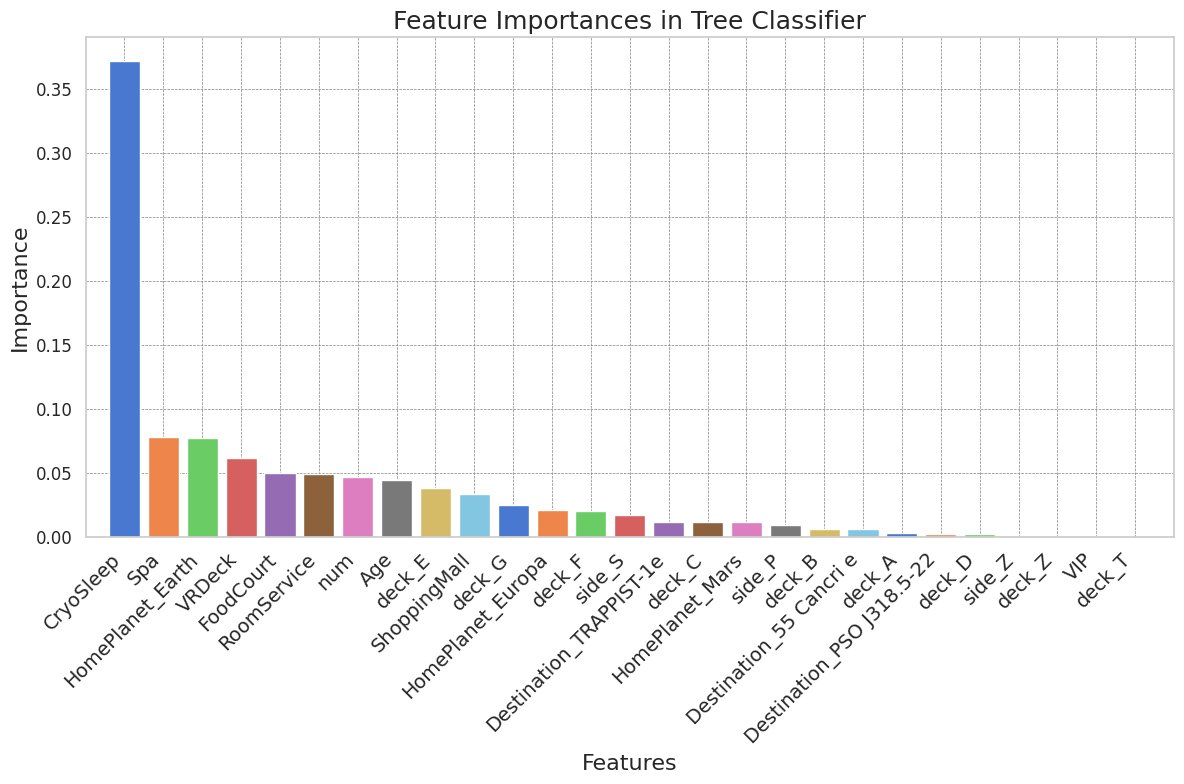

In [70]:
#This block of code visualises the feature importance determined by a
#trained Tree Classifier.
importances = etc_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Tree Classifier', fontsize=18)
plt.bar(range(X_train.shape[1]), importances[indices], color=sns.color_palette("muted"), align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()